In [511]:
## Project title: Predicting students Mathematics performance using machine learning models

######################################################################################
# 1. Load the necessary packages
######################################################################################

# Data processing
import pandas as pd
import numpy as np
import random as rn

# Standardize the data
from sklearn.preprocessing import StandardScaler

# Modeling 
import tensorflow as tf
from sklearn.model_selection import train_test_split


from sklearn.ensemble import GradientBoostingRegressor                     ## for regression
from sklearn.tree import DecisionTreeRegressor                             ## for DT regression
from sklearn.ensemble import RandomForestRegressor                         ## for RF regression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV            ## for regularization
from sklearn.linear_model import lasso_path                                ## for lasso coef path
from sklearn.svm import SVR                                                ## for support vector regression
from sklearn.preprocessing import label_binarize

# Hyperparameter tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score ## for regression
from sklearn import metrics


In [518]:
######################################################################################
## 2. Data import and pre-processing
######################################################################################
dat = pd.read_csv('GP_school_data.csv')
print(dat.shape)  ## check the shape of the data
#print(dat.columns) 


## selecting the variables of interest
## I was analysing the data in R-Studio, so most of the dummy coding and recoding and other cleaning have been made.
dat_1 = dat.drop(['school','address','sex', 'Medu','Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
                 'freetime', 'goout', 'Dalc','romantic', 'famsize', 'mom_home', 'mom_health', 'mom_other', 'mom_services',
                  'mom_teacher', 'dad_home', 'dad_health','dad_other', 'dad_services','dad_teacher',  
                  'less_fifteen', 'fifteen_and_thirty','thirty_to_hour', 'more_than_hour', 'Walc', 'Dalc', 
                  'Pstatus', 'studytime'], axis=1)


## recoding the binary variables from yes/no to 1/0
## First confirming the values 
#yes_no_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']
#for col in yes_no_columns:
#    print(dat_1[col].value_counts())
    
## Now, recoding   
def recode(col):
    return col.map({'yes': 1, 'no': 0})
dat_1[yes_no_columns] = dat_1[yes_no_columns].apply(recode)

print(dat_1[['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']].describe())

## creating thre datasets for each outcome (i.e., the continuous, binary, and multi-categorical)
dat_continuous = dat_1.drop(['G3_binary', 'G3_ordinal'], axis =1)
dat_binary = dat_1.drop(['G3', 'G3_ordinal'], axis =1)
dat_ordinal = dat_1.drop(['G3', 'G3_binary'], axis =1)
print(dat_1.shape)
print(dat_continuous.shape)
print(dat_binary.shape)
print(dat_ordinal.shape)
print(dat_1.columns)

(349, 71)
        schoolsup      famsup        paid  activities     nursery      higher  \
count  349.000000  349.000000  349.000000  349.000000  349.000000  349.000000   
mean     0.146132    0.641834    0.461318    0.530086    0.808023    0.951289   
std      0.353745    0.480150    0.499217    0.499811    0.394421    0.215571   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
50%      0.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         internet  
count  349.000000  
mean     0.851003  
std      0.356597  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  
(349, 39)
(349, 37)
(349, 37)
(349, 37)
Index(['age', 'failures', 'schoolsup', '

In [558]:
######################################################################################
## 3. Some graphics to further understand the data
######################################################################################
cont = ['G1', 'G2', 'absences']
dat_continuous[cont].describe()

,G1,G2,absences
count,349.000000,349.000000,349.000000
mean,10.939828,10.782235,5.965616
std,3.319109,3.808434,8.341764
min,3.000000,0.000000,0.000000
25%,8.000000,9.000000,0.000000
50%,11.000000,11.000000,4.000000
75%,13.000000,13.000000,8.000000
max,19.000000,19.000000,75.000000


In [561]:
######################################################################################
# 4. Data split and standardization for the continuous outcome
######################################################################################
# seed for reproducibility
seed = 999

## The below is necessary for starting Numpy generated random numbers
## in a well-defined initial state.
np.random.seed(seed)

# Train (80%) and test (20%) set split (For the contregress)
# Make separate data set for Y and X
Y_cont = dat_continuous['G3']
X_cont = dat_continuous.drop(['G3'], axis=1)

print(f'The dependent (Y) dataset has {Y_cont.shape}.')
print(f'The independent (X) dataset has {X_cont.shape}.')

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test  = train_test_split( X_cont, Y_cont, test_size = 0.2, random_state = 42)

print(f'The training dataset has {len(X_train)} observations')
print(f'The test dataset has {len(X_test)} observations')


# Standardization of continuous variable.
# VERY IMPORTANT: to avoid any information leaking from testing data to training data, we do standardization separately. 
# define continuous variable columns
continuous_vars = ['age', 'famrel', 'health', 'G1', 'G2', 'absences']
scaler = StandardScaler()
X_train[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test[continuous_vars] = scaler.fit_transform(X_test[continuous_vars])
print(X_train[continuous_vars].describe())
print(X_test[continuous_vars].describe())

## checking the dimension of data
print(f'The training dataset has {X_train.shape}')
print(f'The test dataset has {X_test.shape}')



The dependent (Y) dataset has (349,).
The independent (X) dataset has (349, 36).
The training dataset has 279 observations
The test dataset has 70 observations
                age        famrel        health            G1            G2  \
count  2.790000e+02  2.790000e+02  2.790000e+02  2.790000e+02  2.790000e+02   
mean   1.655386e-16  1.368877e-16 -6.048527e-17  3.501779e-17 -2.355742e-16   
std    1.001797e+00  1.001797e+00  1.001797e+00  1.001797e+00  1.001797e+00   
min   -1.291384e+00 -3.502358e+00 -1.891300e+00 -2.314836e+00 -2.701073e+00   
25%   -4.725290e-01  5.525565e-02 -4.336407e-01 -8.450152e-01 -4.273907e-01   
50%   -4.725290e-01  5.525565e-02  2.951891e-01  3.687722e-02  7.787204e-02   
75%    3.463256e-01  6.481913e-01  1.024019e+00  6.248055e-01  5.831348e-01   
max    4.440599e+00  1.241127e+00  1.024019e+00  2.388590e+00  2.098923e+00   

           absences  
count  2.790000e+02  
mean  -2.387576e-17  
std    1.001797e+00  
min   -6.944599e-01  
25%   -6.944599e-0

In [329]:
######################################################################################
# 5. Model building (linear regression)
######################################################################################
import warnings
warnings.filterwarnings("ignore") ## suppress warnings (already checked them)

# Define the linear regression model using TensorFlow Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense (1, input_shape = (X_train.shape[1],), activation = None)
])

# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# creating new datasets for this analysis
X_train_reg = X_train
X_test_reg = X_test
y_train_reg = y_train
y_test_reg = y_test

# Train the model
history = model.fit(X_train_reg, y_train_reg, validation_data = (X_test_reg, y_test_reg), epochs = 100, verbose = False)

# Extract the training and testing loss history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Generate the prediction
y_pred_reg = model.predict(X_test_reg)

# Print the final training and testing loss
final_train_loss = train_loss[-1]
final_test_loss = test_loss[-1]  


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Mean Squared Error of test: 5.644483885538411
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error of train: 5.80052078851772
Mean Absolute Error of test: 1.525651502609253
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error of train: 1.5842563413804578
Coefficient of Determination: 0.6618044406507841


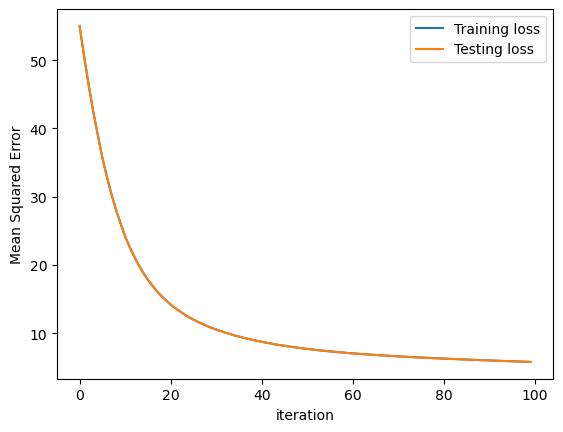

In [331]:
######################################################################################
# 6. Model evaluation and plotting
######################################################################################

# Print MSE
print('Mean Squared Error of test:', mean_squared_error(y_test_reg, y_pred_reg))
print('Mean Squared Error of train:', mean_squared_error(y_train_reg, model.predict(X_train_reg)))

# Print MAE
print('Mean Absolute Error of test:', mean_absolute_error(y_test_reg, y_pred_reg))
print('Mean Absolute Error of train:', mean_absolute_error(y_train_reg, model.predict(X_train_reg)))

# Print R^2
print('Coefficient of Determination:', r2_score(y_test_reg, y_pred_reg))

# Plot the training and testing loss history
plt.plot(train_loss, label = "Training loss")
plt.plot(train_loss, label = "Testing loss")
plt.xlabel("iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.savefig('linear_regression_tf_THBMD.png')


In [333]:
################################################################
## Decision tree model
################################################################

# Define the decision tree regressor
dt = DecisionTreeRegressor(random_state = 42)

# Define the search space for hyperparameters
dt_param_space = {
    'max_depth':(1, 10, 20, 30, 50),
    'min_samples_split': (2, 20, 30, 50),
    'min_samples_leaf': (1, 10, 30, 50),
}

# creating new datasets for this analysis
X_train_dt = X_train
X_test_dt = X_test
y_train_dt = y_train
y_test_dt = y_test

# Instantiate the grid search model (n_jobs is about the number of cores of the computer to be used)
dt_search_grid = GridSearchCV(estimator = dt, param_grid=dt_param_space, n_jobs = -1, cv = 10, verbose = False)


# Fit the model using training data
dt_search_grid.fit(X_train_dt, y_train_dt)


# Get the best hyperparameters and best model
dt_best_grid = dt_search_grid.best_estimator_
dt_best_params = dt_search_grid.best_params_


## Re-fit the model with the best hyperparameters
## nb: this time, we are using the full train data. No splitting of data.
dt_final_model = DecisionTreeRegressor(**dt_best_params) 
dt_final_model.fit(X_train_dt, y_train_dt)


# Now, the prediction
y_pred_dt = dt_final_model.predict(X_test_dt)

The best parameters are {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mean Squared Error of test:  3.348216258941597
Mean Squared Error of train: 1.8052793760810841
Mean Absolute Error of test:  1.1833731989299217
Mean Absolute Error of train:  0.8084011918926529
Coefficient of Determination: 0.7993878814295028


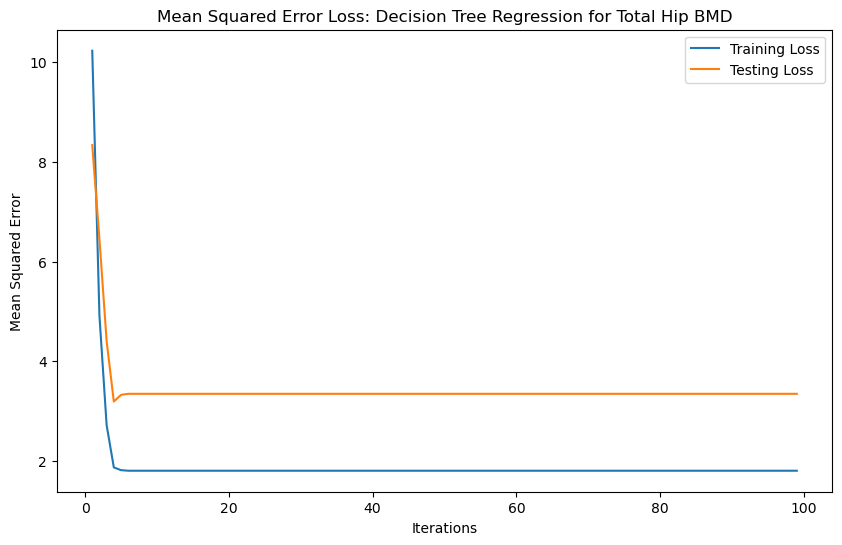

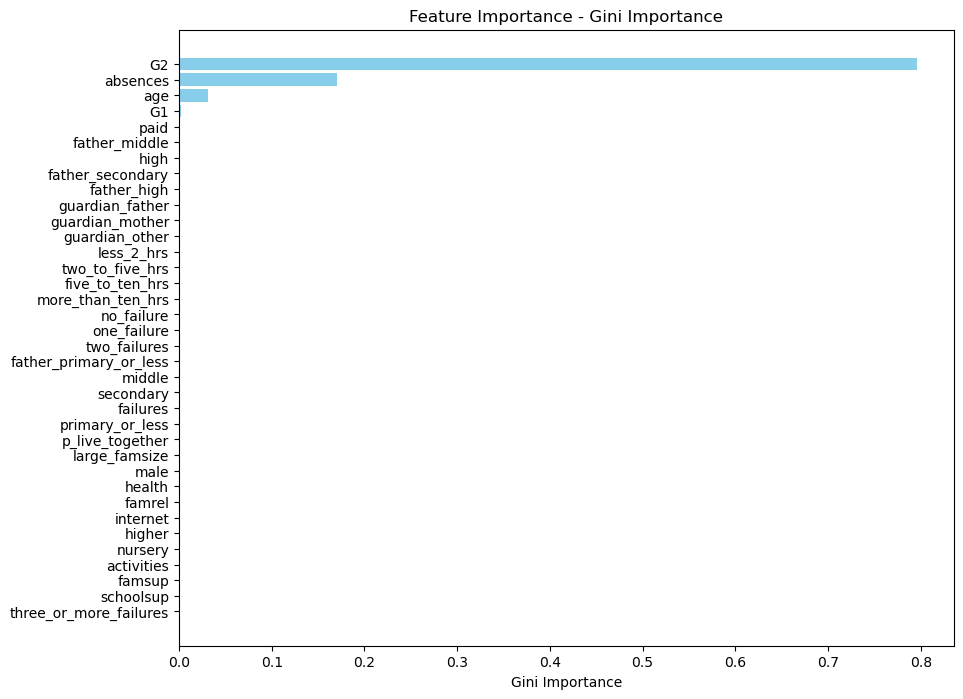

In [335]:
######################################################################################
# 5. Model evaluation and plotting for the Decision Tree
######################################################################################

# Function to compute MSE at each epoch
def compute_loss_dt(model_dt, X, y):
    y_pred_dt = model_dt.predict(X)
    return mean_squared_error(y, y_pred_dt)

# Plot the training and testing loss for each epoch
train_loss_hist = []
test_loss_hist = []

for depth in range(1, 100):
    regressor = DecisionTreeRegressor(random_state=42, 
                                      max_depth=depth,
                                      min_samples_split=dt_best_params['min_samples_split'], 
                                      min_samples_leaf=dt_best_params['min_samples_leaf'])
    regressor.fit(X_train_dt, y_train_dt)
    train_loss_hist.append(mean_squared_error(y_train_dt, regressor.predict(X_train_dt)))
    test_loss_hist.append(mean_squared_error(y_test_dt, regressor.predict(X_test_dt))) 

# print the best hyperparameters
print(f'The best parameters are {dt_best_params}')

# Print MSE
print('Mean Squared Error of test: ', mean_squared_error(y_test_dt, y_pred_dt))
print('Mean Squared Error of train:', mean_squared_error(y_train_dt, dt_final_model.predict(X_train_dt)))

# Print MAE
print('Mean Absolute Error of test: ', mean_absolute_error(y_test_dt, y_pred_dt))
print('Mean Absolute Error of train: ', mean_absolute_error(y_train_dt, dt_final_model.predict(X_train_dt)))

# Print R^2
print('Coefficient of Determination:', r2_score(y_test_dt, y_pred_dt))

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), train_loss_hist, label='Training Loss')
plt.plot(range(1, 100), test_loss_hist, label='Testing Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Mean Squared Error Loss: Decision Tree Regression for Total Hip BMD')
plt.savefig('decision_tree_THBMD.png')


# Let's get variable importance
## Getting feature names from training data
feature_names_dt = X_test_dt.columns  

## Get feature importances
importances_dt = dt_best_grid.feature_importances_

## Create a DataFrame for display
feature_imp_dt = pd.DataFrame({
    'Feature': feature_names_dt,
    'Gini Importance': importances_dt
}).sort_values('Gini Importance', ascending=False)
#print(feature_imp_dt)

## Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_dt['Feature'], feature_imp_dt['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
plt.show()


In [337]:
######################################################################################
# 4. Model building for random forest
######################################################################################

rf = RandomForestRegressor()

# Hyperparameter search for RF
rf_param_grid = {
    'max_depth': [20, 30, 50, 100],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [100, 200, 300]  
    }

# creating new datasets for this analysis
X_train_rf = X_train
X_test_rf = X_test
y_train_rf = y_train
y_test_rf = y_test

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, n_jobs = -1, cv = 10, verbose=False)

# Fit the model using training data
rf_grid_search.fit(X_train_rf, y_train_rf)

rf_best_grid = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_

rf_final_model = RandomForestRegressor(**rf_best_params)
rf_final_model.fit(X_train_rf, y_train_rf)

y_pred_rf = rf_final_model.predict(X_test_rf)

The best parameters are {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
Mean Squared Error of test:  4.84435440904514
Mean Squared Error of train: 2.946582545139239
Mean Absolute Error of test:  1.5613736189329823
Mean Absolute Error of train:  1.1798094953040756
Coefficient of Determination: 0.7097450923280323


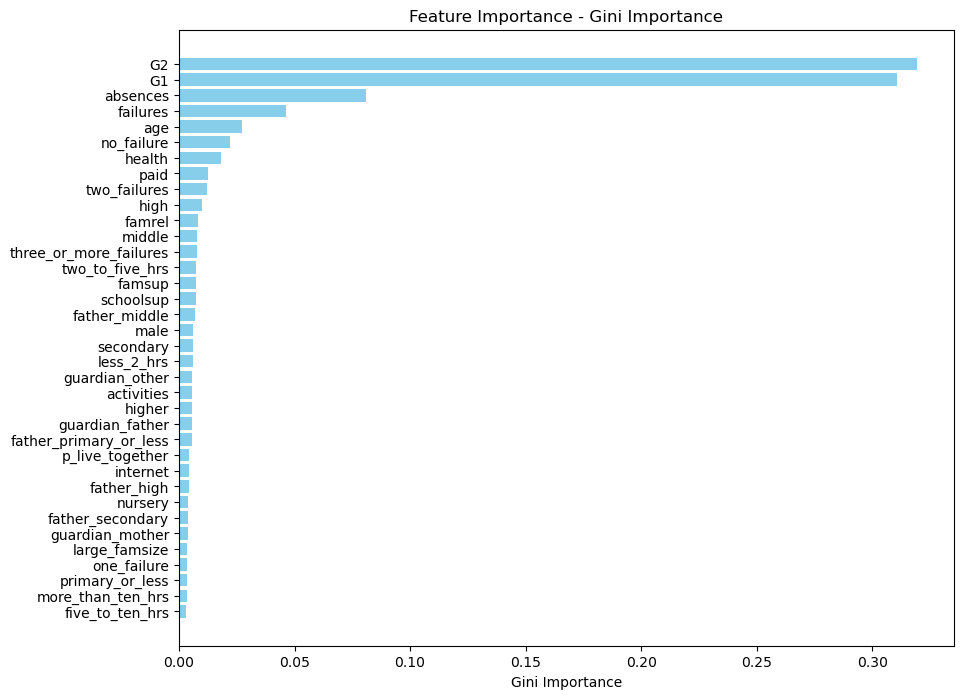

In [339]:
################################################################
## Random forest model
################################################################

# Function to compute MSE at each epoch
def compute_loss_rf(model_rf, X, y):
    y_pred_rf = model_rf.predict(X)
    return mean_squared_error(y, y_pred_rf)

# Store loss values at each epoch
train_loss = []
test_loss = []

for i in range(1, 100):
    model_rf = RandomForestRegressor(n_estimators=i, 
                                  max_features=rf_best_params['max_features'], 
                                  max_depth=rf_best_params['max_depth'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'])
    model_rf.fit(X_train_rf, y_train_rf)
    train_loss.append(compute_loss_rf(model_rf, X_train_rf, y_train_rf))
    test_loss.append(compute_loss_rf(model_rf, X_test_rf, y_test_rf))

# print the best hyperparameters
print(f'The best parameters are {rf_best_params}')

# Print MSE
print('Mean Squared Error of test: ', mean_squared_error(y_test_rf, y_pred_rf))
print('Mean Squared Error of train:', mean_squared_error(y_train_rf, rf_best_grid.predict(X_train_rf)))

# Print MAE
print('Mean Absolute Error of test: ', mean_absolute_error(y_test_rf, y_pred_rf))
print('Mean Absolute Error of train: ', mean_absolute_error(y_train_rf, rf_best_grid.predict(X_train_rf)))

# Print R^2
print('Coefficient of Determination:', r2_score(y_test_rf, y_pred_rf))

## Let's get variable importance
## Getting feature names from training data
feature_names_rf = X_test_rf.columns  

## Get feature importances
importances_rf = rf_best_grid.feature_importances_

## Create a DataFrame for display
feature_imp_rf = pd.DataFrame({
    'Feature': feature_names,
    'Gini Importance': importances_rf
}).sort_values('Gini Importance', ascending=False)
#print(feature_imp_df)

## Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_rf['Feature'], feature_imp_rf['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
plt.show()


In [341]:
######################################################################################
# 4. Model building for Gradient boosting Algorithm
######################################################################################
import warnings
warnings.filterwarnings("ignore") ## hide warnings for now

gb = GradientBoostingRegressor()

# Hyperparameter search. The numbers on commented out on the right were not included to reduce computational time
gb_param_grid = {
    "n_estimators":[50, 100],                   # 100, 300
    "max_depth":[1,3,5],                        # 10, 30, 50
    "learning_rate":[0.01,0.1, 0.5],            # 1.0
    "subsample": [0.5, 1.0, 2.0],               # 0.3
    "min_samples_split": [2, 5, 10],            # 20
    "max_features": ['log2', 'sqrt'],
    "min_impurity_decrease": [ 0.0, 0.3, 0.1]   ##0.3
    }
# creating new datasets for this analysis
X_train_gb = X_train
X_test_gb = X_test
y_train_gb = y_train
y_test_gb = y_test

gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=10, scoring='neg_mean_squared_error', verbose=False)
gb_grid_search.fit(X_train_gb, y_train_gb)

gb_best_grid = gb_grid_search.best_estimator_
gb_best_params = gb_grid_search.best_params_

gb_final_model = GradientBoostingRegressor(**gb_best_params)
gb_final_model.fit(X_train_gb, y_train_gb)

y_pred_gb = gb_final_model.predict(X_test_gb)


The best parameters are {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_split': 10, 'n_estimators': 100, 'subsample': 1.0}
Mean Squared Error of test:  3.97846506590308
Mean Squared Error of train: 0.17285111863205235
Mean Absolute Error of test:  1.3608477191752546
Mean Absolute Error of train:  0.2913932556982626
Coefficient of Determinatoin: 0.761625819897958


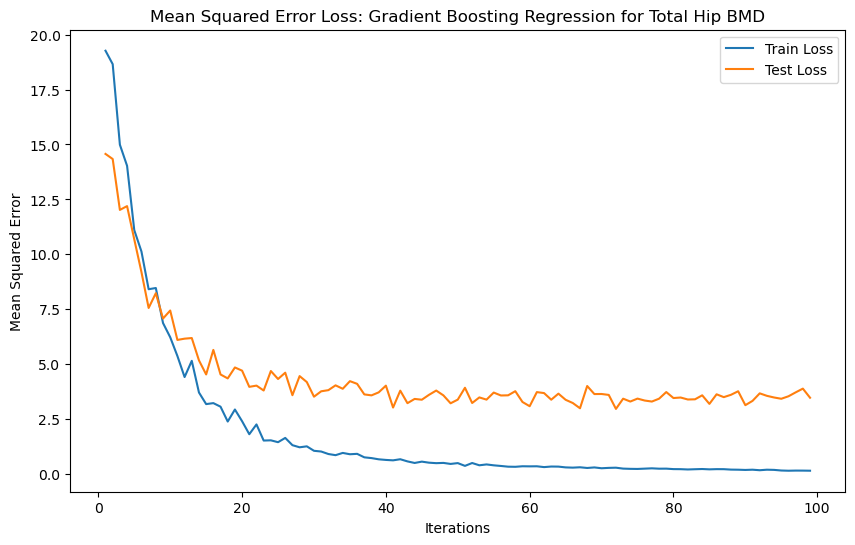

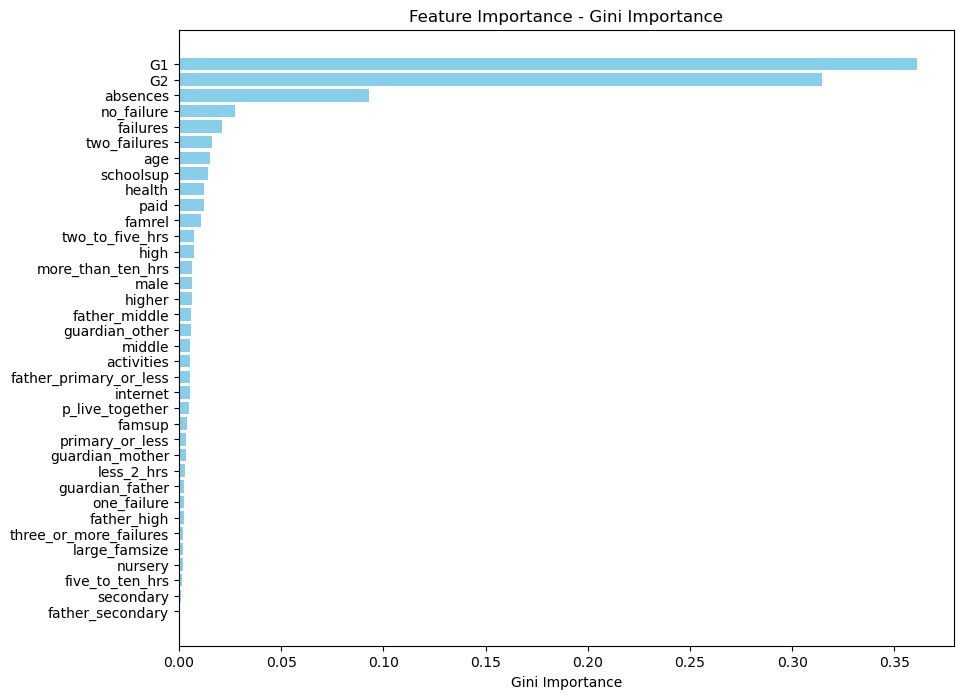

In [343]:
######################################################################################
# Model evaluation and plotting for Gradient Boosting
######################################################################################

# Function to compute MSE at each epoch
def compute_loss_gb(model_gb, X, y):
    y_pred_gb = model_gb.predict(X)
    return mean_squared_error(y, y_pred_gb)

# Store loss values at each epoch
train_loss = []
test_loss = []

for i in range(1, 100):
    model_gb = GradientBoostingRegressor(n_estimators=i, 
                                      learning_rate=gb_best_params['learning_rate'], 
                                      max_depth=gb_best_params['max_depth'],
                                      subsample = gb_best_params['subsample'],
                                      min_samples_split = gb_best_params['min_samples_split'],
                                      max_features = gb_best_params['max_features'],
                                      min_impurity_decrease = gb_best_params['min_impurity_decrease'])
    model_gb.fit(X_train_gb, y_train_gb)
    train_loss.append(compute_loss_gb(model_gb, X_train_gb, y_train_gb))
    test_loss.append(compute_loss_gb(model_gb, X_test_gb, y_test_gb))

# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), train_loss, label='Train Loss')
plt.plot(range(1, 100), test_loss, label='Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Mean Squared Error Loss: Gradient Boosting Regression for Total Hip BMD')
plt.savefig('gradient_boosting_THBMD.png')

# print the best hyperparameters
print(f'The best parameters are {gb_best_params}')

# Print MSE
print('Mean Squared Error of test: ', mean_squared_error(y_test_gb, y_pred_gb))
print('Mean Squared Error of train:', mean_squared_error(y_train_gb, gb_best_grid.predict(X_train_gb)))

# Print MAE
print('Mean Absolute Error of test: ', mean_absolute_error(y_test_gb, y_pred_gb))
print('Mean Absolute Error of train: ', mean_absolute_error(y_train_gb, gb_best_grid.predict(X_train_gb)))

# Print R^2
print('Coefficient of Determinatoin:', r2_score(y_test_gb, y_pred_gb))

## Let's get variable importance
## Getting feature names from training data
feature_names_gb = X_test_gb.columns  

## Get feature importances
importances_gb = gb_best_grid.feature_importances_

## Create a DataFrame for display
feature_imp_gb = pd.DataFrame({
    'Feature': feature_names_gb,
    'Gini Importance': importances_gb
}).sort_values('Gini Importance', ascending=False)
#print(feature_imp_gbr)

## Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_imp_gb['Feature'], feature_imp_gb['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()
plt.show()

In [483]:
#############################################################
## Support Vector Machine (SVM)
#############################################################

X_train_svr = X_train
X_test_svr = X_test
y_train_svr = y_train
y_test_svr = y_test

# SVR
svr = SVR(kernel='rbf')

# Parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto']
}

seed = 42
cv = KFold(n_splits=5, shuffle=True, random_state = seed)

# Grid search with reproducible splits
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# The training model
svr_cv = grid_search.fit(X_train_svr, y_train_svr)

#Test Set Evaluation
best_svr = svr_cv.best_estimator_
y_pred_svr = best_svr.predict(X_test_svr)
print("R² on Test Data:", round(r2_score(y_test_svr, y_pred_svr), 4))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
R² on Test Data: 0.7858


Alpha          0.073842
Mean CV MSE    3.649755
Name: 78, dtype: float64


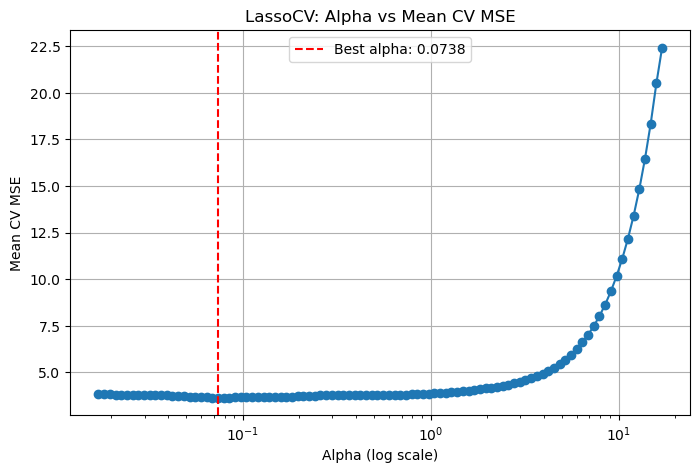

Best alpha (Lasso): 0.073842
Coefficients at Best Alpha:
age               -0.228238
activities        -0.171100
famrel             0.281373
absences           0.037625
G1                 0.156299
G2                 0.966557
father_middle     -0.259940
guardian_mother    0.143788
dtype: float64
R² on test data: 0.7657112965502151


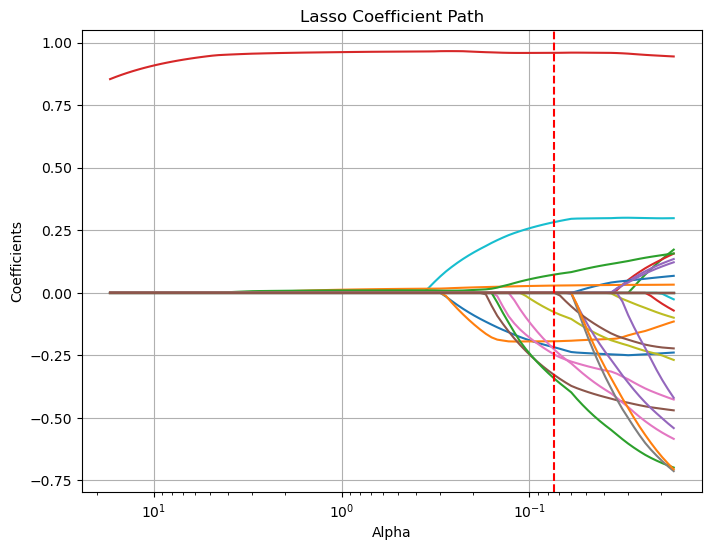

In [427]:
#############################################################
## Lasso regression
#############################################################
X_train_lasso = X_train
X_test_lasso = X_test
y_train_lasso = y_train
y_test_lasso = y_test

## cross_validation
lasso_cv = LassoCV(cv = 20, random_state = 42) 
lasso_cv.fit(X_train_lasso, y_train_lasso)

# printing all the alphas
alphas = lasso_cv.alphas_  # the grid of alphas that was tested (descending order)
mse_path = lasso_cv.mse_path_.mean(axis=1)  # average MSE across folds

# Put into a DataFrame
cv_results_df = pd.DataFrame({
    'Alpha': alphas,
    'Mean CV MSE': mse_path
})
#print(cv_results_df)

## print the row with the minimum CV Mean Square Error and its corresping alpha
best_row = cv_results_df.loc[cv_results_df['Mean CV MSE'].idxmin()]
print(best_row)

## Plot the alpha vrs MSE and indicate the line corresponding to the best alpha (i.e.,alpha with the minimum CV MSE)
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse_path, marker='o')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Best alpha: {lasso_cv.alpha_:.4f}')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean CV MSE')
plt.title('LassoCV: Alpha vs Mean CV MSE')
plt.legend()
plt.grid(True)
plt.show()


## Printing the coefficients that corresponds to the best alpha
coef_lasso = pd.Series(lasso_cv.coef_, index=X_train.columns)
print("Best alpha (Lasso):", round(lasso_cv.alpha_, 6))
print("Coefficients at Best Alpha:")
# print(coef_lasso)                (# This line will print all coefficients including those shrunk to zero)
print(coef_lasso[coef_lasso != 0])  # Printing only non-zero
print("R² on test data:", r2_score(y_test_lasso, lasso_cv.predict(X_test_lasso)))

###########################################################################
## Plotting the coefficient path (this is notr based on our results above)
###########################################################################
## making the graphs comparable (so, use the same alphas as the one used in the lasso_CV)
alphas_used = lasso_cv.alphas_

alpha_lasso, coefs_lasso, _ = lasso_path(X_train_lasso, y_train_lasso, alphas = alphas_used)

plt.figure(figsize=(8,6))
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_lasso, coefs_lasso[i], label = X_train_lasso.columns[i])

plt.xscale('log')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--', label=f'Best alpha: {lasso_cv.alpha_:.4f}')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficient Path')
plt.gca().invert_xaxis()
#plt.legend(loc='upper left', fontsize = 'small', bbox_to_anchor = (1.05, 1), borderaxespad=0.) ## hide te legend
plt.grid(True)
plt.show()


In [439]:
#############################################################
## Ridge regression
#############################################################
X_train_ridge = X_train
X_test_ridge = X_test
y_train_ridge = y_train
y_test_ridge = y_test

## Fitting the model
alpha_vals = [0.1, 1.0, 10.0, 30, 50, 70, 100.0]  # Gid of alpha values
ridge_cv = RidgeCV(alphas=alpha_vals, cv=20)
ridge_cv.fit(X_train_ridge, y_train_ridge)

## Print the coefficients
coef_ridge = pd.DataFrame({
    'Feature': X_train_ridge.columns,
    'Ridge Coefficient': ridge_cv.coef_
}).sort_values(by='Ridge Coefficient', key=abs, ascending=False)
print(coef_ridge)

## Evaluating the model
print("Best alpha (Ridge):", ridge_cv.alpha_)
print("R² on test data:", r2_score(y_test_ridge, ridge_cv.predict(X_test_ridge)))



                   Feature  Ridge Coefficient
13                      G2           0.905215
9                   famrel           0.240177
12                      G1           0.218719
0                      age          -0.209096
5               activities          -0.191281
22           father_middle          -0.184374
26         guardian_mother           0.144300
23        father_secondary           0.136167
31       more_than_ten_hrs          -0.135406
21  father_primary_or_less           0.130380
2                schoolsup           0.120359
3                   famsup           0.119104
18                  middle          -0.109241
27          guardian_other          -0.103685
6                  nursery          -0.101343
14                    male           0.100797
34            two_failures          -0.091369
24             father_high          -0.082174
4                     paid           0.081664
32              no_failure           0.076830
29         two_to_five_hrs        

In [453]:
#############################################################
## Elastic Net
#############################################################
X_train_enet = X_train
X_test_enet = X_test
y_train_enet = y_train
y_test_enet = y_test

## Fitting the model
l1_l2_mix = [.1, .5, .7, .9, .95] ## The list of values for the mixing parameter (i.e., alpha parameter)
elastic_cv = ElasticNetCV(cv=20, l1_ratio=l1_l2_mix, random_state=42) 
elastic_cv.fit(X_train_enet, y_train_enet)

## Print the coefficients
coef_enet = pd.DataFrame({
    'Feature': X_train_enet.columns,
    'ElasticNet Coefficient': elastic_cv.coef_
}).sort_values(by='ElasticNet Coefficient', key=abs, ascending=False)

print(coef_enet)       ## prints all, including thoes shrunk to zero
print(coef_enet[coef_enet['ElasticNet Coefficient']!=0]) ## Print only the non_zero coefficients
print("Best alpha (ElasticNet):", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)
print("R² on test data:", r2_score(y_test_enet, elastic_cv.predict(X_test_enet)))

                   Feature  ElasticNet Coefficient
13                      G2                0.965876
9                   famrel                0.280116
22           father_middle               -0.255111
0                      age               -0.227536
5               activities               -0.167948
12                      G1                0.156896
26         guardian_mother                0.141087
11                absences                0.037625
32              no_failure                0.000000
31       more_than_ten_hrs               -0.000000
30         five_to_ten_hrs               -0.000000
29         two_to_five_hrs                0.000000
33             one_failure               -0.000000
21  father_primary_or_less                0.000000
34            two_failures               -0.000000
27          guardian_other               -0.000000
25         guardian_father               -0.000000
24             father_high               -0.000000
23        father_secondary     

                       Model  R2_Score
0          Linear Regression    0.6618
1                      Lasso    0.7657
2                      Ridge    0.7670
3                 ElasticNet    0.7656
4             Decision Trees    0.7994
5              Random Forest    0.7097
6          Gradient Boosting    0.7616
7  Support Vector Regression    0.7858


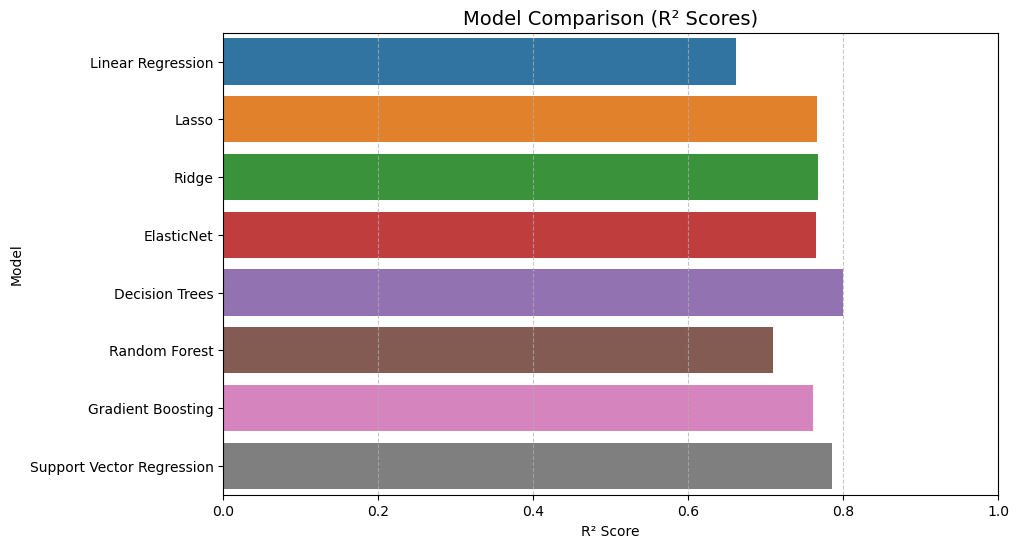

In [593]:
################################################################
## Plotting the R2_score for all the models and choose the best
################################################################
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet', 'Decision Trees',
               'Random Forest', 'Gradient Boosting', 'Support Vector Regression']

r2_scores = [
    r2_score(y_test_reg, y_pred_reg),
    r2_score(y_test_lasso, lasso_cv.predict(X_test_lasso)),
    r2_score(y_test_ridge, ridge_cv.predict(X_test_ridge)),
    r2_score(y_test_enet, elastic_cv.predict(X_test_enet)),
    r2_score(y_test_dt, y_pred_dt),
    r2_score(y_test_rf, y_pred_rf),
    r2_score(y_test_gb, y_pred_gb),
    r2_score(y_test_svr, y_pred_svr), 
]

# Creating the DataFrame
final_results= pd.DataFrame({
    'Model': model_names,
    'R2_Score': [round(score, 4) for score in r2_scores]
})

print(final_results)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x= 'R2_Score', y='Model', data=final_results)
plt.title('Model Comparison (R² Scores)', fontsize=14)
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.xlim(0, 1) ## The values 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('Model performance (continuous target variable).png')
plt.show()
